Problem Statement:❓
Using different techniques of Machine Learning, we need to build a Recommender System that recommends movies based on “ Cast, Genre, Reviews, TMDB/IMDB ratings”

Using different types of recommendation techniques like:
1. Popularity based recommender system
2. Content based Recommender System
3. Collaborative Recommender System


# Importing dependencies 

In [1]:
#from google.colab import drive
#from google.colab import files
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [2]:
# Mount Google Drive
#drive.mount('/content/drive')

In [3]:
credits=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\credits.csv")
movies=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\movies_metadata.csv",low_memory=False)
keywords=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\keywords.csv")
links=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\links.csv")
rating=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\ratings_small.csv")

In [4]:
print('Shape of Credits:',credits.shape)
print('Shape of Movies:',movies.shape)
print('Shape of keywords:',keywords.shape)
print('Shape of links:',links.shape)
print('Shape of rating:',rating.shape)

Shape of Credits: (45476, 3)
Shape of Movies: (45466, 24)
Shape of keywords: (46419, 2)
Shape of links: (45843, 3)
Shape of rating: (100004, 4)


In [5]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [8]:
print(credits.columns)

Index(['cast', 'crew', 'id'], dtype='object')


In [9]:
movies.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [10]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [12]:
#changing datatype of id column
movies = movies[movies['id'].str.isnumeric()]  # Keep only rows with numeric 'id' values
movies['id'] = movies['id'].astype(int)  # Convert 'id' column to integer

In [13]:
print(movies.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [14]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [15]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [16]:
print(keywords.columns)

Index(['id', 'keywords'], dtype='object')


In [17]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [18]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [19]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [20]:
links.describe()

,movieId,imdbId,tmdbId
count,45843.000000,4.584300e+04,45624.000000
mean,96578.775626,9.937080e+05,108661.382847
std,57216.863469,1.361924e+06,112665.970830
min,1.000000,1.000000e+00,2.000000
25%,49202.500000,8.333050e+04,26502.750000
50%,108799.000000,2.839910e+05,60178.000000
75%,145270.500000,1.538311e+06,157849.500000
max,176279.000000,7.158814e+06,469172.000000


In [21]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [22]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [23]:
rating.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


Count: There are a total of 100,004 ratings in the dataset.

Mean: The average rating is approximately 3.54 

Standard Deviation (std): The standard deviation of 1.06 This implies that the ratings tend to cluster closer to the average, indicating less disagreement among users.

Minimum (min) and Maximum (max):  rating scale ranges from 0.5 to 5, with a wide range of possible values.

In [24]:
# Merge the two dataframes based on the 'id' column
df = pd.merge(credits, movies,  on='id')
df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [25]:
new_df = pd.merge(df, keywords, on='id') 

In [26]:
new_df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [27]:
new_df.columns

Index(['cast', 'crew', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keywords'],
      dtype='object')

In [28]:
new_df.shape

(46628, 27)

In [29]:
new_df.isnull().sum()

cast                         0
crew                         0
id                           0
adult                        0
belongs_to_collection    42054
budget                       0
genres                       0
homepage                 38619
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25845
title                        4
video                        4
vote_average                 4
vote_count                   4
keywords                     0
dtype: int64

In [30]:
new_df.dropna(subset=['title','release_date'], inplace=True)

In [31]:
#creating new feature year
# Convert the 'release_date' to datetime if it's not already in datetime format
new_df['release_date'] = pd.to_datetime(new_df['release_date'])

# Extract the year from the date
new_df['release_year'] = new_df['release_date'].dt.year 

In [32]:
new_df['popularity'] = pd.to_numeric(new_df['popularity'], errors='coerce')
new_df['popularity'] = new_df['popularity'].round(2)

In [33]:
new_df['popularity']

0        21.95
1        17.02
2        11.71
3         3.86
4         8.39
         ...  
46622     5.68
46624     0.18
46625     0.90
46626     0.00
46627     0.16
Name: popularity, Length: 46540, dtype: float64

In [34]:
new_df['overview'].mode()[0]

'No overview found.'

In [35]:
# Replace 'No overview found' and NaN with null string
new_df['overview'] = new_df['overview'].replace(['No overview found', np.nan], '')

In [36]:
# Replace NaN with null string
new_df['tagline'] = new_df['tagline'].replace( np.nan, '')

In [37]:
# Replace NaN values in 'original_language' column with 'Unknown'
new_df['original_language'].fillna('Unknown', inplace=True)


In [38]:
mean_runtime = new_df['runtime'].mean()
# Fill NaN values in 'runtime' column with mean value


In [39]:
new_df['runtime'].fillna(mean_runtime, inplace=True)
# Replace NaN values in 'original_language' column with 'Unknown'
new_df['status'].fillna('Unknown', inplace=True)

I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) =  ((v/(v+m)).R)+(m/v+m_.C)



where,

*   v is the number of votes for the movie

*   m is the minimum votes required to be listed in the chart

*   R is the average rating of the movie
*   C is the mean vote across the whole report







In [40]:
vote_counts = new_df[new_df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = new_df[new_df['vote_average'].notnull()]['vote_average'].astype('int')
mean_vote = vote_averages.mean()
total_votes = vote_counts.sum()

In [41]:
# Define the minimum vote count threshold for considering a movie
min_vote_count=vote_counts.quantile(0.95) #min_vote_count
min_vote_count

426.0

 to qualify to be considered for the chart, a movie has to have at least 434 votes on TMDB

In [42]:
# Compute the weighted rating for each movie
new_df['weighted_rating'] = (vote_counts / (vote_counts + min_vote_count)) * vote_averages + (min_vote_count / (vote_counts + min_vote_count)) * mean_vote

In [43]:
new_df['vote_count'] = new_df['vote_count'].astype('int')
new_df['vote_average'] = new_df['vote_average'].astype('int')

In [44]:
new_df.duplicated().sum()


1174

In [45]:
new_df = new_df.drop_duplicates()

In [46]:
new_df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7,5415,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1995,6.871918
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6,2413,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",1995,5.886535
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6,92,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",1995,5.378133
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6,34,"[{'id': 818, 'name': 'based on novel'}, {'id':...",1995,5.299724
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5,173,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",1995,5.173411


# cleaning textual data

In [47]:
new_df.iloc[500].genres #this is in form of string so we have to change it

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]"

In [48]:
#created a function to extract value of key name 
import ast

def extract_names(data):
    names = []
    parsed_data = ast.literal_eval(data)
    for item in parsed_data:
        if 'name' in item:
            name = item['name']
            names.append(name)
    return names


In [49]:
new_df['genres']=new_df['genres'].apply(extract_names)

In [50]:
new_df.iloc[0].keywords

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [51]:
new_df['keywords']=new_df['keywords'].apply(extract_names)

In [52]:
new_df.iloc[0].cast

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [53]:
#created a function to extract top 4 actor from cast
def extract_top_names(data, top_n):
    names = []
    parsed_data = ast.literal_eval(data)
    for item in parsed_data:
        name = item['name']
        names.append(name)
    top_names = names[:top_n]
    return top_names

In [54]:
top_n = 3
new_df['cast']= new_df['cast'].apply(lambda x: extract_top_names(x, top_n))

In [55]:
new_df['crew'][2]

"[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, 'job': 'Director', 'name': 'Howard Deutch', 'profile_path': '/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg'}, {'credit_id': '52fe466b9251416c75077aa3', 'department': 'Writing', 'gender': 2, 'id': 16837, 'job': 'Characters', 'name': 'Mark Steven Johnson', 'profile_path': '/6trChNn3o2bi4i2ipgMEAytwmZp.jpg'}, {'credit_id': '52fe466b9251416c75077aa9', 'department': 'Writing', 'gender': 2, 'id': 16837, 'job': 'Writer', 'name': 'Mark Steven Johnson', 'profile_path': '/6trChNn3o2bi4i2ipgMEAytwmZp.jpg'}, {'credit_id': '5675eb4b92514179dd003933', 'department': 'Crew', 'gender': 2, 'id': 1551320, 'job': 'Sound Recordist', 'name': 'Jack Keller', 'profile_path': None}]"

In [56]:
#function to fetch director name from crew
def director(data):
    director=[]
    for i in ast.literal_eval(data):
        if i['job']=='Director':
            director.append(i['name'])
            break
    return director
            

In [57]:
new_df['director']=new_df['crew'].apply(director)

In [58]:
new_df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating,director
0,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,tt0114709,en,...,Released,,Toy Story,False,7,5415,"[jealousy, toy, boy, friendship, friends, riva...",1995,6.871918,[John Lasseter]
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,tt0113497,en,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6,2413,"[board game, disappearance, based on children'...",1995,5.886535,[Joe Johnston]
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,tt0113228,en,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6,92,"[fishing, best friend, duringcreditsstinger, o...",1995,5.378133,[Howard Deutch]
3,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,tt0114885,en,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6,34,"[based on novel, interracial relationship, sin...",1995,5.299724,[Forest Whitaker]
4,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,tt0113041,en,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5,173,"[baby, midlife crisis, confidence, aging, daug...",1995,5.173411,[Charles Shyer]


**# EDA**

In [59]:
new_df.describe()

,id,popularity,revenue,runtime,vote_average,vote_count,release_year,weighted_rating
count,45366.000000,45366.000000,4.536600e+04,45366.000000,45366.000000,45366.000000,45366.000000,45366.000000
mean,108023.606137,2.926470,1.123399e+07,94.181506,5.250099,110.118238,1991.880020,5.306155
std,112165.809893,6.010149,6.439696e+07,38.237082,1.859061,491.795587,24.055565,0.232519
min,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,3.533710
25%,26387.250000,0.390000,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,5.236613
50%,59857.500000,1.130000,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,5.247946
75%,156500.500000,3.690000,0.000000e+00,107.000000,6.000000,34.000000,2010.000000,5.280168
max,469172.000000,547.490000,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,7.919031




*  There are a total of 45,366 movies in the dataset
*   The average popularity score is approximately 2.93.


*   The range of release years in the dataset spans from 1874 to 2020
*  The average vote average is 5.25 .the average rating tends to be slightly above average


*   The average vote count is approximately 110.12
*   The average weighted rating is 5.31. 







In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45366 entries, 0 to 46627
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cast                   45366 non-null  object        
 1   crew                   45366 non-null  object        
 2   id                     45366 non-null  int64         
 3   adult                  45366 non-null  object        
 4   belongs_to_collection  4488 non-null   object        
 5   budget                 45366 non-null  object        
 6   genres                 45366 non-null  object        
 7   homepage               7764 non-null   object        
 8   imdb_id                45352 non-null  object        
 9   original_language      45366 non-null  object        
 10  original_title         45366 non-null  object        
 11  overview               45366 non-null  object        
 12  popularity             45366 non-null  float64       
 13  p

In [61]:
new_df['original_language'].value_counts()

en    32196
fr     2438
it     1528
ja     1351
de     1077
      ...  
la        1
fy        1
rw        1
tg        1
si        1
Name: original_language, Length: 90, dtype: int64

English is domination the moving data set

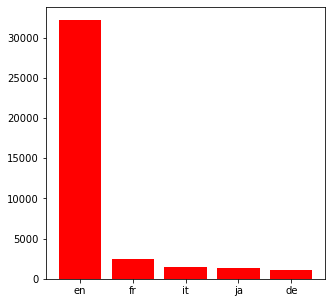

In [62]:
plt.figure(figsize=(5,5))
plt.bar(list(new_df['original_language'].value_counts()[0:5].keys()),list(new_df['original_language'].value_counts()[0:5]),color="r")
plt.show()        

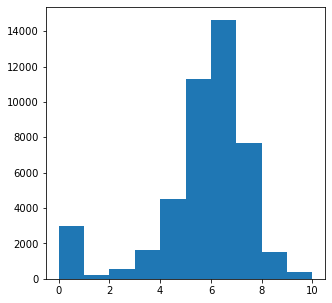

In [63]:
plt.figure(figsize=(5,5))
plt.hist(new_df['vote_average'])
plt.show()

max voting average is lies in 6 to 8 range

In [64]:
high_rated_movies=new_df[new_df['vote_average']>8]

In [65]:
high_rated_movies.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating,director
186,"[Mia Farrow, Tony Goldwyn, Scott Glenn]","[{'credit_id': '561cd1ea9251415a7200351b', 'de...",58372,False,NaN,0,"[Fantasy, Comedy, Drama]",NaN,tt0114241,en,...,Released,The most twisted Christmas ever.,Reckless,False,10,1,"[trauma, game show, female protagonist, christ...",1995,5.254972,[Norman René]
394,"[Эрика Элениак, William McNamara, Michael Lerner]","[{'credit_id': '545bb5590e0a261fa9002264', 'de...",278939,False,NaN,0,"[Romance, Adventure, Crime, Drama]",NaN,tt0113173,en,...,Released,On our first date... we robbed a bank,Girl in the Cadillac,False,10,1,"[robbery, bank, cadillac, money, bus station]",1995,5.254972,[Lucas Platt]
713,"[Maila Nurmi, Dolores Fuller, Paul Marco]","[{'credit_id': '52fe4890c3a368484e0ff711', 'de...",73183,False,NaN,0,[Documentary],NaN,tt0113270,en,...,Released,Can your MIND stand the SHOCKING TRUTH?,"The Haunted World of Edward D. Wood, Jr.",False,10,1,[],1996,5.254972,[Brett Thompson]
745,"[Carmen Miranda, Aurora Miranda, Cesar Romero]","[{'credit_id': '52fe4ef19251416c911431d5', 'de...",255546,False,NaN,0,[Documentary],NaN,tt0109381,pt,...,Released,,Carmen Miranda: Bananas Is My Business,False,10,1,"[latin, profile, woman director]",1995,5.254972,[Helena Solberg]
1654,[Anna Levine],[],64562,False,NaN,0,[Drama],NaN,tt0119845,en,...,Released,,Other Voices Other Rooms,False,10,1,[],1995,5.254972,[]


In [66]:
high_rated_movies.shape

(390, 30)

In [67]:
top5_high=high_rated_movies.sort_values(by="vote_average",ascending=False).head()

In [68]:
top5_high

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,status,tagline,title,video,vote_average,vote_count,keywords,release_year,weighted_rating,director
186,"[Mia Farrow, Tony Goldwyn, Scott Glenn]","[{'credit_id': '561cd1ea9251415a7200351b', 'de...",58372,False,NaN,0,"[Fantasy, Comedy, Drama]",NaN,tt0114241,en,...,Released,The most twisted Christmas ever.,Reckless,False,10,1,"[trauma, game show, female protagonist, christ...",1995,5.254972,[Norman René]
29489,"[Lenore Zann, Geoffrey MacKay, Helene Udy]","[{'credit_id': '5800a6b4c3a3686b1b003ebd', 'de...",72178,False,NaN,0,[Comedy],NaN,tt0091682,en,...,Released,"What fantasy could be worth $50,000?",One Night Only,False,10,1,[],1986,5.254972,[Timothy Bond]
27779,[],"[{'credit_id': '572fa7f89251413bd9001d2f', 'de...",53543,False,NaN,0,[Animation],NaN,tt0252993,en,...,Released,,Claymation Comedy of Horrors,False,10,1,[],1991,5.254972,[Barry Bruce]
27842,"[Charles Laughton, Elsa Lanchester, Robert New...","[{'credit_id': '52fe4c599251416c75117b11', 'de...",180954,False,NaN,0,"[Comedy, Drama, Romance]",NaN,tt0030933,en,...,Released,,Vessel of Wrath,False,10,1,"[missionary, drunk]",1938,5.254972,[Erich Pommer]
27983,"[Lasse Kolsrud, Sofie Gråbøl, Bjørn Sundquist]","[{'credit_id': '52fe49cb9251416c910b8ee7', 'de...",87506,False,NaN,0,"[Action, Adventure, Fantasy, Drama, Romance]",NaN,tt0114081,en,...,Released,,Pan,False,10,1,[],1995,5.254972,[Henning Carlsen]


In [69]:
average_ratings = top5_high['vote_average']
movie_titles = top5_high['title']

In [70]:
top5_high['title'].unique()

array(['Reckless', 'One Night Only', 'Claymation Comedy of Horrors',
       'Vessel of Wrath', 'Pan'], dtype=object)

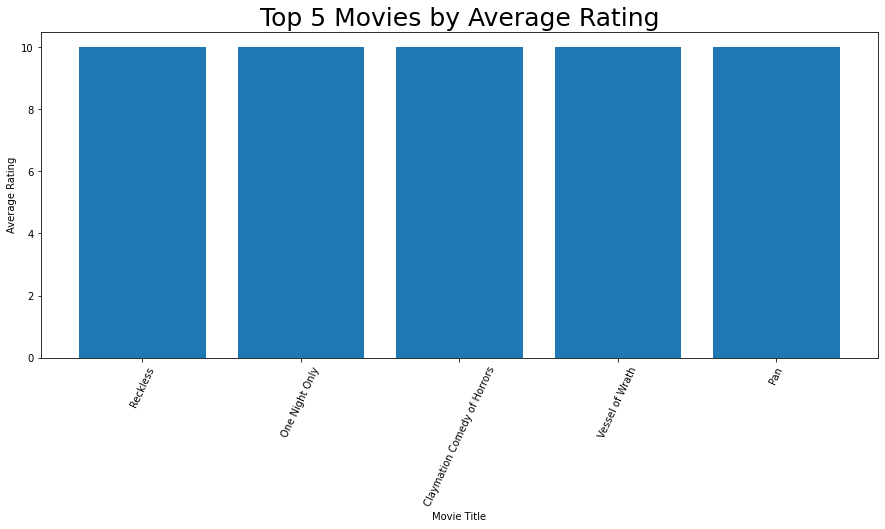

In [71]:
plt.figure(figsize=(15, 6))
plt.bar(movie_titles, average_ratings)
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title('Top 5 Movies by Average Rating',fontsize=25)
plt.xticks(rotation=65)
plt.show()

In [72]:
top5_revenue=new_df.sort_values(by="revenue",ascending=False).head()

In [73]:
revenue = top5_revenue['revenue']
movie_titles = top5_revenue['title']

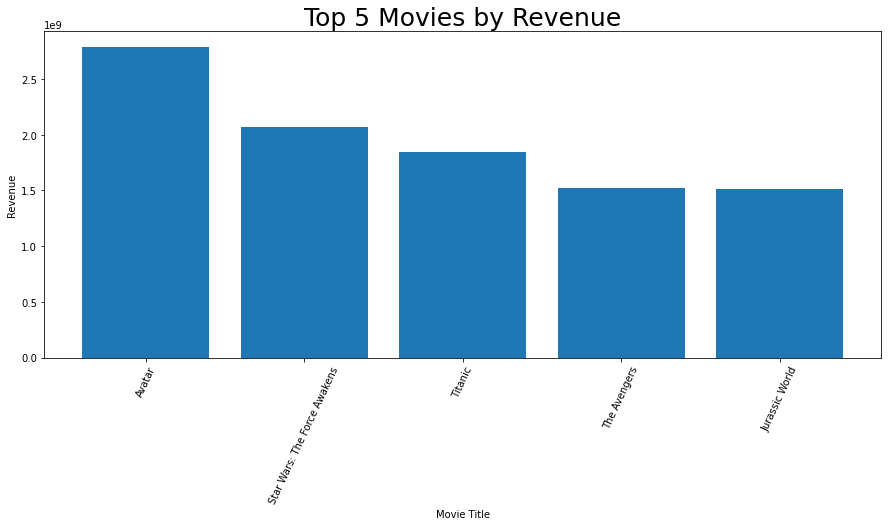

In [74]:
plt.figure(figsize=(15, 6))
plt.bar(movie_titles, revenue)
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.title('Top 5 Movies by Revenue',fontsize=25)
plt.xticks(rotation=65)
plt.show()

In [75]:
top5_runtime=new_df.sort_values(by="runtime",ascending=False).head()

In [76]:
movie_title=top5_runtime['title']
runtime=(top5_runtime['runtime'])


In [77]:
runtime

24380    1256.0
20168    1140.0
42104    1140.0
13918     931.0
14111     925.0
Name: runtime, dtype: float64

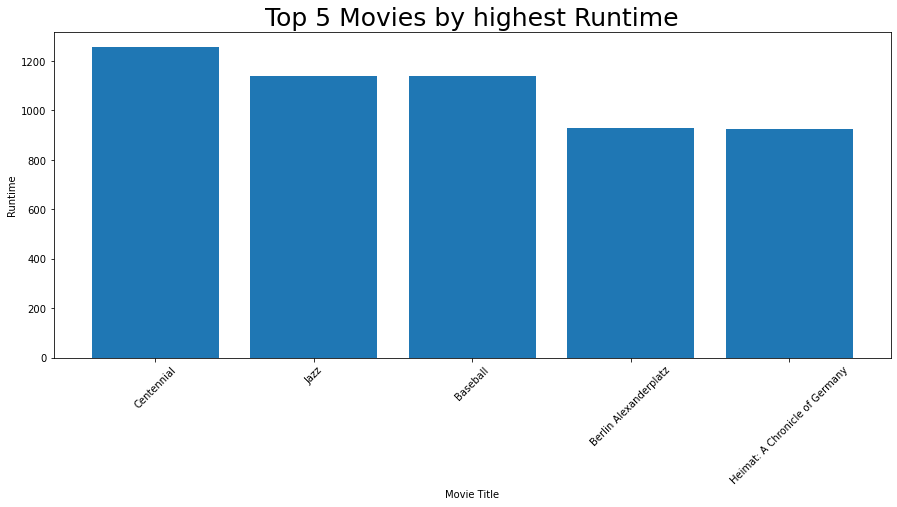

In [78]:
plt.figure(figsize=(15, 6))
plt.bar(movie_title, runtime)
plt.xlabel('Movie Title')
plt.ylabel('Runtime')
plt.title('Top 5 Movies by highest Runtime',fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [79]:
new_df['runtime'].value_counts()

90.0     2548
0.0      1534
100.0    1470
95.0     1412
93.0     1213
         ... 
410.0       1
283.0       1
238.0       1
566.0       1
780.0       1
Name: runtime, Length: 354, dtype: int64

In [80]:
top5_vote_count=new_df.sort_values(by="vote_count",ascending=False).head()

In [81]:
movie=top5_vote_count['title']
vote_count=top5_vote_count['vote_count']

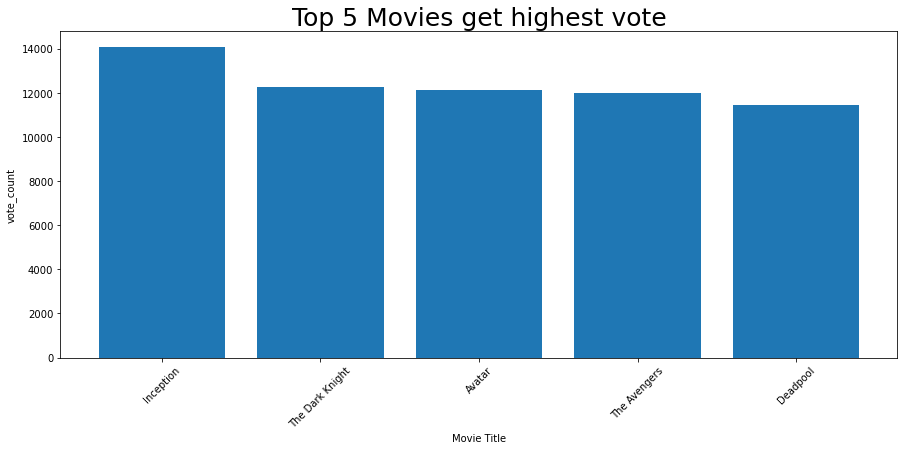

In [82]:
plt.figure(figsize=(15, 6))
plt.bar(movie, vote_count)
plt.xlabel('Movie Title')
plt.ylabel('vote_count')
plt.title('Top 5 Movies get highest vote',fontsize=25)
plt.xticks(rotation=45)
plt.show()

inception get highest vote

In [83]:
new_df['status'].value_counts()

Released           44927
Rumored              229
Post Production       97
Unknown               80
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [84]:
status=new_df['status'].value_counts()
status_title = status.index


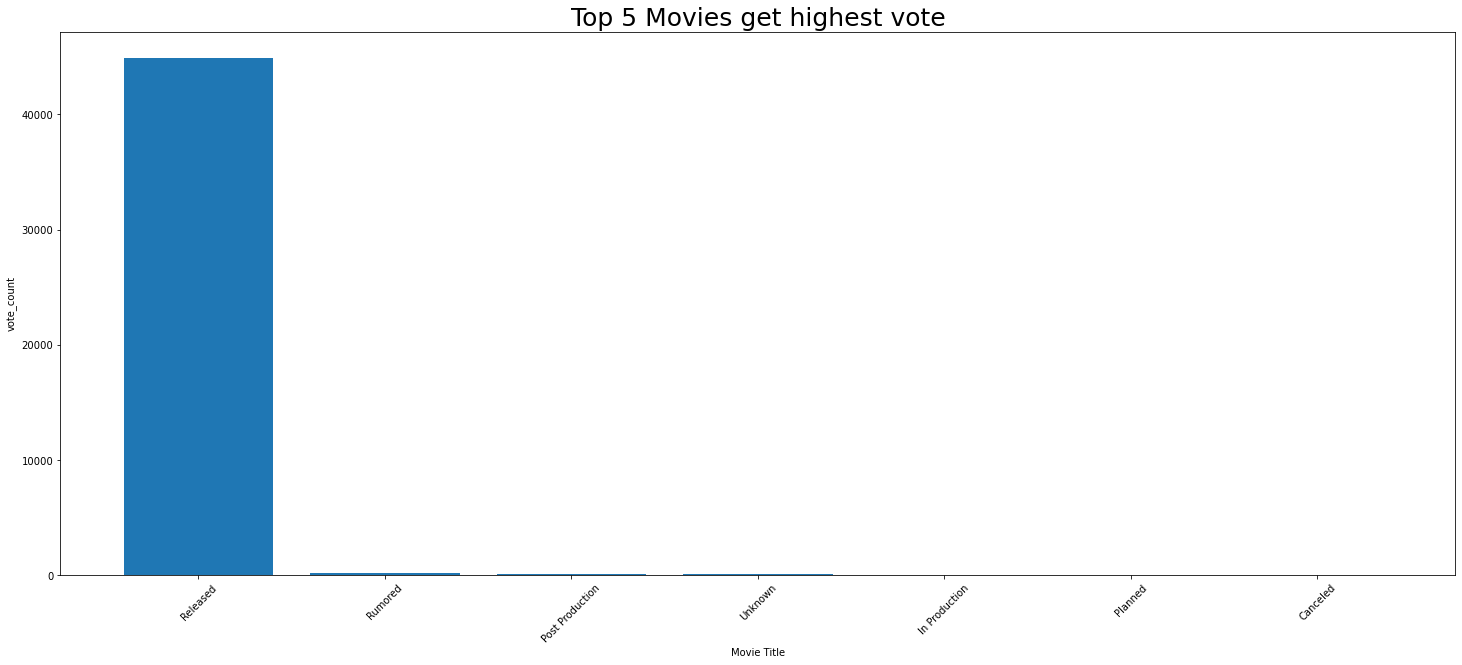

In [85]:
plt.figure(figsize=(25, 10))
plt.bar(status_title, status)
plt.xlabel('Movie Title')
plt.ylabel('vote_count')
plt.title('Top 5 Movies get highest vote',fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [86]:
gen=df['genres'].astype('str')

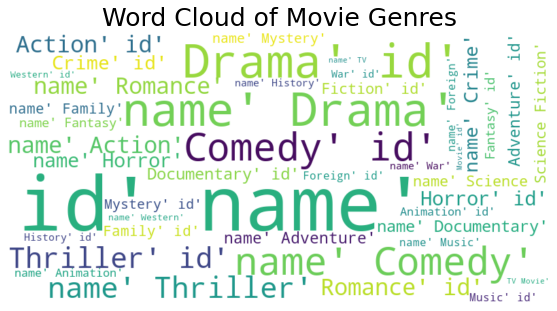

In [87]:
from wordcloud import WordCloud

# Join all movie titles into a single string
titles_text = ' '.join(gen)

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres',fontsize=25)
plt.show()


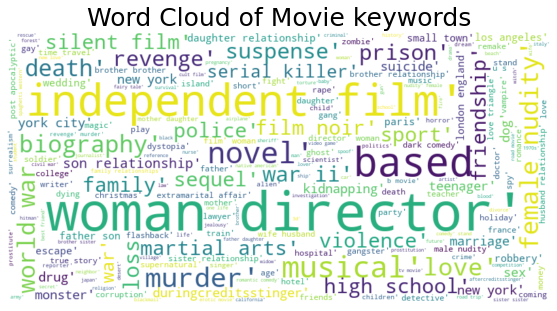

In [88]:
keywords=new_df['keywords'].astype('str')
from wordcloud import WordCloud

# Join all movie titles into a single string
titles_text = ' '.join(keywords)

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie keywords',fontsize=25)
plt.show()


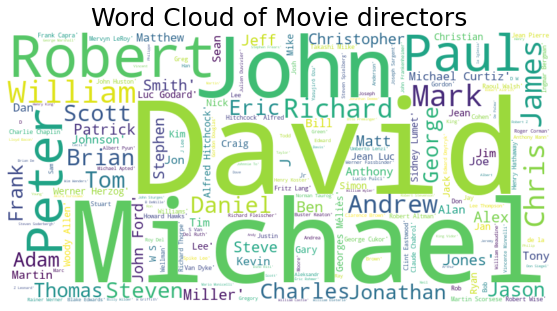

In [89]:
director=new_df['director'].astype('str')
from wordcloud import WordCloud

# Join all movie titles into a single string
titles_text = ' '.join(director)

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie directors',fontsize=25)
plt.show()


In [90]:
new_df.corr()

,id,popularity,revenue,runtime,vote_average,vote_count,release_year,weighted_rating
id,1.000000,-0.082546,-0.071031,-0.118410,-0.146627,-0.064529,0.286846,-0.097266
popularity,-0.082546,1.000000,0.506200,0.129596,0.140740,0.559940,0.131693,0.434856
revenue,-0.071031,0.506200,1.000000,0.103955,0.079282,0.812014,0.088381,0.458647
runtime,-0.118410,0.129596,0.103955,1.000000,0.146768,0.113512,0.078718,0.148558
vote_average,-0.146627,0.140740,0.079282,0.146768,1.000000,0.118515,0.017174,0.296850
vote_count,-0.064529,0.559940,0.812014,0.113512,0.118515,1.000000,0.106813,0.661405
release_year,0.286846,0.131693,0.088381,0.078718,0.017174,0.106813,1.000000,0.040449
weighted_rating,-0.097266,0.434856,0.458647,0.148558,0.296850,0.661405,0.040449,1.000000





*   Popularity and vote count have a relatively strong positive correlation (0.56), indicating that movies with higher popularity tend to have more votes.
*   Revenue and vote count also show a strong positive correlation (0.81), suggesting that movies with higher revenue tend to attract more votes.

*   Vote average and weighted rating have a moderate positive correlation (0.30), indicating that movies with higher vote averages tend to have higher weighted ratings.
*   
Popularity and revenue have a moderate positive correlation (0.51), implying that movies with higher popularity may have a higher chance of generating revenue.

*   Runtime does not show a strong correlation with other variables, suggesting that the duration of a movie does not have a significant impact on its popularity, revenue, or vote count.

*   Release year and popularity have a weak positive correlation (0.13), indicating a slight increase in popularity over time, although other factors may have a more significant influence.






In [91]:
#Mention Director 3 times to give it more weight relative to the entire cast.
#new_df['director'] = new_df['director'].apply(lambda x: [x,x, x])

We will do a small amount of pre-processing of our keywords before putting them to any use. As a first step, we calculate the frequenct counts of every keyword that appears in the dataset.

In [92]:
new_df=new_df[['id','imdb_id','title','cast','director', 'genres', 'keywords','overview','tagline',  'popularity', 'release_year', 'vote_average', 'vote_count', 'weighted_rating' ]].reset_index(drop=True)



In [93]:
new_df.head()

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating
0,862,tt0114709,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ...",,21.95,1995,7,5415,6.871918
1,8844,tt0113497,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,17.02,1995,6,2413,5.886535
2,15602,tt0113228,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,11.71,1995,6,92,5.378133
3,31357,tt0114885,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],"[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,3.86,1995,6,34,5.299724
4,11862,tt0113041,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],[Comedy],"[baby, midlife crisis, confidence, aging, daug...",Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,8.39,1995,5,173,5.173411


In [94]:
new_df.shape

(45366, 14)

In [95]:
#remove spaces from name to make them single intity 
new_df['cast']=new_df['cast'].apply(lambda x: [i.replace(" ","") for i in x])
new_df['keywords']=new_df['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
new_df['genres']=new_df['genres'].apply(lambda x: [i.replace(" ","") for i in x])
new_df['director']=new_df['director'].apply(lambda x: [i.replace(" ","") for i in x])

In [96]:
import re

def preprocess_title(title):
    # Convert title to lowercase
    title = title.lower()
    
    # Remove leading and trailing white spaces
    title = title.strip()
    
    # Replace multiple consecutive spaces with a single space
    title = re.sub(r'\s+', ' ', title)
    
    # Remove any non-alphanumeric characters except spaces
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    
    return title


In [97]:
#new_df['title']=new_df['title'].apply(preprocess_title)

In [98]:
new_df.head(2)

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating
0,862,tt0114709,Toy Story,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","Led by Woody, Andy's toys live happily in his ...",,21.95,1995,7,5415,6.871918
1,8844,tt0113497,Jumanji,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,17.02,1995,6,2413,5.886535


In [99]:
top_movie=new_df[['title','release_year','vote_count','popularity','genres','weighted_rating']]

In [100]:
top_movie=top_movie.sort_values('weighted_rating', ascending=False).head(250)

In [101]:
top_movie.head(10)

,title,release_year,vote_count,popularity,genres,weighted_rating
15486,Inception,2010,14075,29.11,"[Action, Thriller, ScienceFiction, Mystery, Ad...",7.919031
12490,The Dark Knight,2008,12269,123.17,"[Drama, Action, Crime, Thriller]",7.907513
22858,Interstellar,2014,11187,32.21,"[Adventure, Drama, ScienceFiction]",7.898895
2845,Fight Club,1999,9678,63.87,[Drama],7.883796
4867,The Lord of the Rings: The Fellowship of the Ring,2001,8892,32.07,"[Adventure, Fantasy, Action]",7.873994
292,Pulp Fiction,1994,8670,140.95,"[Thriller, Crime]",7.870918
314,The Shawshank Redemption,1994,8358,51.65,"[Drama, Crime]",7.866333
7009,The Lord of the Rings: The Return of the King,2003,8226,29.32,"[Adventure, Fantasy, Action]",7.864294
351,Forrest Gump,1994,8147,48.31,"[Comedy, Drama, Romance]",7.863044
5821,The Lord of the Rings: The Two Towers,2002,7641,29.42,"[Adventure, Fantasy, Action]",7.854453


In [102]:
#function that builds charts for particular genres.

In [103]:
k = new_df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
k.name = 'genre'
gen_df = new_df.drop('genres', axis=1).join(k)

In [104]:

def gen_chart(genre, percentile=0.85):
    df = gen_df [gen_df ['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    top_movie = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'release_year', 'vote_count', 'vote_average', 'popularity']]
    top_movie['vote_count'] = top_movie['vote_count'].astype('int')
    top_movie['vote_average'] = top_movie['vote_average'].astype('int')
    
    top_movie['wr'] = top_movie.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    top_movie = top_movie.sort_values('wr', ascending=False).head(250)
    
    return top_movie

In [105]:
gen_chart('Action').head(10)

,title,release_year,vote_count,vote_average,popularity,wr
15486,Inception,2010,14075,8,29.11,7.954982
12490,The Dark Knight,2008,12269,8,123.17,7.948476
4867,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.07,7.929396
7009,The Lord of the Rings: The Return of the King,2003,8226,8,29.32,7.923834
5821,The Lord of the Rings: The Two Towers,2002,7641,8,29.42,7.918171
256,Star Wars,1977,6778,8,42.15,7.908091
1156,The Empire Strikes Back,1980,5998,8,19.47,7.896576
4136,Scarface,1983,3017,8,11.30,7.801556
9437,Oldboy,2003,2000,8,10.62,7.710960
1911,Seven Samurai,1954,892,8,15.02,7.424928


top action movie is Inception

# Content Based Recommender

In [106]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [107]:
links.shape

(45843, 3)

In [108]:
links=links[links['tmdbId'].notnull()]['tmdbId'].astype('int')


In [109]:
new_df3= new_df [new_df ['id'].isin(links)]

In [110]:
new_df3.shape

(45366, 14)

we have 9096 movies

In [111]:
#links=links.rename(columns={'movieId': 'id'})


In [112]:
new_df3['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [113]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [114]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

contraction_mapping = {
    "'s": " is",
    "'t": " not",
    "'ve":" have",
    "'cause": "because",
    "'d": " would",
    "'d've": " would have",
    "'ll": " will",
    "how'd": "how did",
    "how'd'y": "how do you",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "'m": " am",
    "let's": "let us",
    "o'clock": "of the clock",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def preprocess_text(text):
    # replace contractions with expanded forms
    for contraction, expansion in contraction_mapping.items():
        text = re.sub(r'\b' + contraction + r'\b', expansion, text)

    # convert to lowercase
    text = text.lower()

    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    tokens = word_tokenize(text)
    
    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # join the tokens back into a single string with spaces
    preprocess_text = ' '.join([token + ' ' for token in lemmatized_tokens])
    
    return preprocess_text

In [115]:
new_df3['overview'] = new_df3['overview'].apply(lambda x:x.split())

In [116]:
new_df3['tagline'] = new_df3['tagline'].apply(lambda x:x.split())

In [117]:
#new_df3['overview']=new_df3['overview'].apply(preprocess_text)

In [118]:
#new_df3['tagline']=new_df3['tagline'].apply(preprocess_text)

In [119]:
#new_df3['keywords']=new_df3['keywords'].apply(preprocess_text)

In [120]:
#new_df3['release_year'] = pd.to_numeric(new_df3['release_year'], errors='coerce')

In [121]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45366 entries, 0 to 45365
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45366 non-null  int64  
 1   imdb_id          45352 non-null  object 
 2   title            45366 non-null  object 
 3   cast             45366 non-null  object 
 4   director         45366 non-null  object 
 5   genres           45366 non-null  object 
 6   keywords         45366 non-null  object 
 7   overview         45366 non-null  object 
 8   tagline          45366 non-null  object 
 9   popularity       45366 non-null  float64
 10  release_year     45366 non-null  int64  
 11  vote_average     45366 non-null  int32  
 12  vote_count       45366 non-null  int32  
 13  weighted_rating  45366 non-null  float64
dtypes: float64(2), int32(2), int64(2), object(8)
memory usage: 5.9+ MB


In [122]:
new_df3

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating
0,862,tt0114709,Toy Story,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Led, by, Woody,, Andy's, toys, live, happily,...",[],21.95,1995,7,5415,6.871918
1,8844,tt0113497,Jumanji,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[When, siblings, Judy, and, Peter, discover, a...","[Roll, the, dice, and, unleash, the, excitement!]",17.02,1995,6,2413,5.886535
2,15602,tt0113228,Grumpier Old Men,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[A, family, wedding, reignites, the, ancient, ...","[Still, Yelling., Still, Fighting., Still, Rea...",11.71,1995,6,92,5.378133
3,31357,tt0114885,Waiting to Exhale,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[Cheated, on,, mistreated, and, stepped, on,, ...","[Friends, are, the, people, who, let, you, be,...",3.86,1995,6,34,5.299724
4,11862,tt0113041,Father of the Bride Part II,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[Just, when, George, Banks, has, recovered, fr...","[Just, When, His, World, Is, Back, To, Normal....",8.39,1995,5,173,5.173411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45361,30840,tt0102797,Robin Hood,"[PatrickBergin, UmaThurman, DavidMorrissey]",[JohnIrvin],"[Drama, Action, Romance]",[],"[Yet, another, version, of, the, classic, epic...",[],5.68,1991,5,26,5.229807
45362,111109,tt2028550,Century of Birthing,"[AngelAquino, PerryDizon, HazelOrencio]",[LavDiaz],[Drama],"[artist, play, pinoy]","[An, artist, struggles, to, finish, his, work,...",[],0.18,2011,9,3,5.270100
45363,67758,tt0303758,Betrayal,"[ErikaEleniak, AdamBaldwin, JulieduPage]",[MarkL.Lester],"[Action, Drama, Thriller]",[],"[When, one, of, her, hits, goes, wrong,, a, pr...","[A, deadly, game, of, wits.]",0.90,2003,3,6,5.212669
45364,227506,tt0008536,Satan Triumphant,"[IwanMosschuchin, NathalieLissenko, PavelPavlov]",[YakovProtazanov],[],[],"[In, a, small, town, live, two, brothers,, one...",[],0.00,1917,0,0,5.243833


In [123]:
new_df3['summary']=new_df3['overview']+new_df3['tagline'] + new_df3['genres']+ 3*new_df3['keywords']+ new_df3['cast'] + 2* new_df3['director']

In [124]:
new_df3

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating,summary
0,862,tt0114709,Toy Story,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Led, by, Woody,, Andy's, toys, live, happily,...",[],21.95,1995,7,5415,6.871918,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,tt0113497,Jumanji,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[When, siblings, Judy, and, Peter, discover, a...","[Roll, the, dice, and, unleash, the, excitement!]",17.02,1995,6,2413,5.886535,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,tt0113228,Grumpier Old Men,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[A, family, wedding, reignites, the, ancient, ...","[Still, Yelling., Still, Fighting., Still, Rea...",11.71,1995,6,92,5.378133,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,tt0114885,Waiting to Exhale,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[Cheated, on,, mistreated, and, stepped, on,, ...","[Friends, are, the, people, who, let, you, be,...",3.86,1995,6,34,5.299724,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,tt0113041,Father of the Bride Part II,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[Just, when, George, Banks, has, recovered, fr...","[Just, When, His, World, Is, Back, To, Normal....",8.39,1995,5,173,5.173411,"[Just, when, George, Banks, has, recovered, fr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45361,30840,tt0102797,Robin Hood,"[PatrickBergin, UmaThurman, DavidMorrissey]",[JohnIrvin],"[Drama, Action, Romance]",[],"[Yet, another, version, of, the, classic, epic...",[],5.68,1991,5,26,5.229807,"[Yet, another, version, of, the, classic, epic..."
45362,111109,tt2028550,Century of Birthing,"[AngelAquino, PerryDizon, HazelOrencio]",[LavDiaz],[Drama],"[artist, play, pinoy]","[An, artist, struggles, to, finish, his, work,...",[],0.18,2011,9,3,5.270100,"[An, artist, struggles, to, finish, his, work,..."
45363,67758,tt0303758,Betrayal,"[ErikaEleniak, AdamBaldwin, JulieduPage]",[MarkL.Lester],"[Action, Drama, Thriller]",[],"[When, one, of, her, hits, goes, wrong,, a, pr...","[A, deadly, game, of, wits.]",0.90,2003,3,6,5.212669,"[When, one, of, her, hits, goes, wrong,, a, pr..."
45364,227506,tt0008536,Satan Triumphant,"[IwanMosschuchin, NathalieLissenko, PavelPavlov]",[YakovProtazanov],[],[],"[In, a, small, town, live, two, brothers,, one...",[],0.00,1917,0,0,5.243833,"[In, a, small, town, live, two, brothers,, one..."


In [125]:
new_df3['summary'][0]

['Led',
 'by',
 'Woody,',
 "Andy's",
 'toys',
 'live',
 'happily',
 'in',
 'his',
 'room',
 'until',
 "Andy's",
 'birthday',
 'brings',
 'Buzz',
 'Lightyear',
 'onto',
 'the',
 'scene.',
 'Afraid',
 'of',
 'losing',
 'his',
 'place',
 'in',
 "Andy's",
 'heart,',
 'Woody',
 'plots',
 'against',
 'Buzz.',
 'But',
 'when',
 'circumstances',
 'separate',
 'Buzz',
 'and',
 'Woody',
 'from',
 'their',
 'owner,',
 'the',
 'duo',
 'eventually',
 'learns',
 'to',
 'put',
 'aside',
 'their',
 'differences.',
 'Animation',
 'Comedy',
 'Family',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'jealousy',
 'toy',
 'boy',
 'friendship',
 'friends',
 'rivalry',
 'boynextdoor',
 'newtoy',
 'toycomestolife',
 'TomHanks',
 'TimAllen',
 'DonRickles',
 'JohnLasseter',
 'JohnLasseter']

In [126]:
new_df4=new_df3[['id','title','summary','imdb_id']]

In [127]:
new_df4['summary']=new_df4['summary'].apply(lambda x: " ".join(x))

In [128]:
new_df4['summary'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences. Animation Comedy Family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife TomHanks TimAllen DonRickles JohnLasseter JohnLasseter"

In [129]:
new_df4['summary']=new_df4['summary'].apply(preprocess_text)

In [130]:
new_df4['summary'][10]

'widowed  u  president  andrew  shepherd  one  world  powerful  men  anything  want  covets  sydney  ellen  wade  washington  lobbyist  shepherd  attempt  courting  spark  wild  rumor  decimate  approval  rating  powerful  man  world  one  thing  want  comedy  drama  romance  whitehouse  usapresident  newlove  widower  wildlifeconservation  whitehouse  usapresident  newlove  widower  wildlifeconservation  whitehouse  usapresident  newlove  widower  wildlifeconservation  michaeldouglas  annettebening  michaeljfox  robreiner  robreiner '

In [131]:
new_df4['summary'][0]

'led  woody  andy  toy  live  happily  room  andy  birthday  brings  buzz  lightyear  onto  scene  afraid  losing  place  andy  heart  woody  plot  buzz  circumstance  separate  buzz  woody  owner  duo  eventually  learns  put  aside  difference  animation  comedy  family  jealousy  toy  boy  friendship  friend  rivalry  boynextdoor  newtoy  toycomestolife  jealousy  toy  boy  friendship  friend  rivalry  boynextdoor  newtoy  toycomestolife  jealousy  toy  boy  friendship  friend  rivalry  boynextdoor  newtoy  toycomestolife  tomhanks  timallen  donrickles  johnlasseter  johnlasseter '

In [132]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

In [133]:
def stem(text):
  x=[]
  for i in text.split():
    x.append(porter.stem(i))
  return " ".join(x)


In [134]:
new_df4['summary']=new_df4['summary'].apply(stem)

In [135]:
new_df4.shape

(45366, 4)

In [136]:
'''
import re

def preprocess_title(title):
    # Convert title to lowercase
    title = title.lower()
    
    # Remove leading and trailing white spaces
    title = title.strip()
    
    # Replace multiple consecutive spaces with a single space
    title = re.sub(r'\s+', ' ', title)
    
    # Remove any non-alphanumeric characters except spaces
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    
    return title
'''

"\nimport re\n\ndef preprocess_title(title):\n    # Convert title to lowercase\n    title = title.lower()\n    \n    # Remove leading and trailing white spaces\n    title = title.strip()\n    \n    # Replace multiple consecutive spaces with a single space\n    title = re.sub(r'\\s+', ' ', title)\n    \n    # Remove any non-alphanumeric characters except spaces\n    title = re.sub(r'[^a-zA-Z0-9\\s]', '', title)\n    \n    return title\n"

In [137]:
#new_df4['title']=new_df4['title'].apply(preprocess_title)


In [138]:
#new_df4['title']

In [139]:
#new_df4['title']=new_df4['title'].str.lower()

In [140]:
#pip install mlflow

In [141]:
import mlflow
import mlflow.sklearn

In [142]:
mlflow.start_run()

2023/06/08 17:52:37 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



<ActiveRun: >

In [143]:
from sklearn.feature_extraction.text import  CountVectorizer
vector = CountVectorizer(max_features=5000 , stop_words='english')
vector_matrix = vector.fit_transform(new_df4['summary']).toarray()

In [144]:
vector_matrix.shape

(45366, 5000)

In [145]:
feature_names=vector.get_feature_names_out()

In [146]:
for feature in feature_names:
    print(feature)

10
100
11
12
12yearold
13
14
15
15yearold
16
17
17yearold
18
18th
18thcenturi
19
1910
1920
1930
1940
1941
1942
1944
1945
1950
1960
1968
1969
1970
1971
1980
1989
1990
1994
1999
19th
19thcenturi
20
2000
2002
2003
2004
2005
2006
2008
2009
2010
2011
2012
20th
21st
23
24
25
30
3d
40
50
60
70
80
90
aaron
abandon
abbi
abduct
abil
abl
aboard
aborigin
abort
abroad
absenc
absolut
absurd
abus
academi
accept
access
accid
accident
acclaim
accompani
accomplish
accord
account
accus
ace
achiev
acquaint
acquir
act
action
activ
activist
actor
actress
actual
ad
adam
adapt
add
addict
addit
address
adjust
administr
admir
admit
adolesc
adolfhitl
adopt
ador
adult
adultanim
adulteri
adulthood
adulthumor
advanc
advantag
adventur
adversari
advertis
advic
advis
affair
affect
afford
afghanistan
afraid
africa
african
africanamerican
aftercreditssting
afterlif
aftermath
afternoon
age
agediffer
agenc
agenda
agent
aggress
ago
agre
ahead
aid
ail
aim
air
aircraft
airlin
airplan
airplanecrash
airport
ajay
aka
akirakuros

dan
danc
dancer
danger
daniel
danish
danni
dare
dark
darkcomedi
darker
darkest
dash
date
daughter
dave
davi
david
davidlynch
dawn
day
daydream
dc
dccomic
dead
deadbodi
deadli
deaf
deafmut
deal
dealer
dean
death
deathofachild
deathofafriend
deathoffath
deathofmoth
deathpenalti
debat
debt
debut
decad
decapit
decay
deceas
deceit
decemb
decept
decid
decis
declar
declin
dedic
deed
deep
deeper
deepli
defeat
defend
defens
defi
defin
definit
delight
delinqu
deliv
deliveri
delus
demand
demis
democraci
democrat
demon
demonicpossess
demonstr
deni
denmark
denni
dennishopp
dentist
depart
departmentstor
depend
depict
deport
depress
depth
deputi
derang
derek
descend
descent
describ
desert
desertedisland
design
desir
desol
despair
desper
despit
destin
destini
destroy
destruct
detect
determin
detroit
devast
develop
devic
devil
devis
devot
di
diabol
diagnos
dialogu
diamond
dian
diana
diari
dick
dictat
dictatorship
die
diego
diet
differ
difficult
difficulti
dig
digit
digniti
dilemma
dimens
diner
dinner
d

implic
import
imposs
impot
impoverish
impress
imprison
improv
improvis
impuls
inadvert
incest
incid
includ
incompet
increas
increasingli
incred
inde
independ
independentfilm
india
indian
indiana
indianlead
individu
indonesia
industri
industrialist
inevit
inexplic
infam
infant
infantri
infatu
infect
infidel
infiltr
influenc
influenti
inform
ingmarbergman
inhabit
inherit
initi
inject
injur
injuri
injustic
inmat
inn
inner
innoc
innov
inquisit
insan
insaneasylum
insect
insecur
insid
insight
insist
inspector
inspir
instal
instant
instantli
instead
instinct
institut
instruct
instructor
instrument
insult
insur
insurg
integr
intellectu
intellig
intend
intens
intent
interact
intern
internet
interpret
interracialrelationship
interrog
interrupt
intersect
intertwin
interview
inthecloset
intim
intimid
intrigu
introduc
invad
invas
invent
inventor
invest
investig
invis
invit
involv
ira
iran
iranian
iraq
iraqwar
ireland
iren
irish
iron
isabel
islam
island
isol
isra
israel
issu
istanbul
itali
italian
i

screenplay
screenwrit
screwballcomedi
script
scroog
scubadiv
sculptor
se
sea
seal
seamonst
sean
search
seasid
season
seat
seattl
sebastian
seclud
second
secret
secretag
secretari
secretident
secretli
secretlov
secretmiss
secretservic
secretsocieti
sect
section
secur
securityguard
seduc
seduct
seedi
seek
seemingli
seen
segment
seiz
select
self
selfdefens
selfdestruct
selfdiscoveri
selfish
selfsacrific
sell
sen
senat
send
senior
sens
sensat
sensit
sensual
sent
sentenc
seoul
separ
septemb
sequel
sequenc
serbian
serf
sergeant
seri
serial
serialkil
seriesofmurd
seriou
serum
serv
servant
servic
session
set
settl
settler
seven
sever
severedhead
sewer
sex
sexaddict
sexcomedi
sexi
sexism
sexploit
sexscen
sexual
sexualabus
sexualattract
sexualfantasi
sexualobsess
shadi
shadow
shake
shakespear
shaman
shame
shanghai
shaolin
shape
share
shark
sharkattack
sharp
shatter
shed
sheep
shell
shelter
shepherd
sheriff
sherlockholm
shi
shield
shift
shine
ship
shipwreck
shirley
shock
shoe
shoot
shootout
shop


In [147]:
new_df4= new_df4.reset_index()
titles = new_df4['title']
indices = pd.Series(new_df4.index, index=new_df4['title'])

In [148]:
'''
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(similarity_scores[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices] '''

'\ndef get_recommendations(title):\n    idx = indices[title]\n    sim_scores = list(enumerate(similarity_scores[idx]))\n    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)\n    sim_scores = sim_scores[1:31]\n    movie_indices = [i[0] for i in sim_scores]\n    return titles.iloc[movie_indices] '

In [149]:
'''
def recommendations(title):
    title = preprocess_title(title)
    query_vec = vector.transform([title])
    similarity = cosine_similarity(query_vec, vector_matrix).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = new_df4['title'].iloc[indices].iloc[::-1]
    
    return results

'''

"\ndef recommendations(title):\n    title = preprocess_title(title)\n    query_vec = vector.transform([title])\n    similarity = cosine_similarity(query_vec, vector_matrix).flatten()\n    indices = np.argpartition(similarity, -5)[-5:]\n    results = new_df4['title'].iloc[indices].iloc[::-1]\n    \n    return results\n\n"

In [150]:
#from sklearn.metrics.pairwise import cosine_similarity
#similarity_scores= cosine_similarity(vector_matrix, vector_matrix)

In [151]:
#from sklearn.metrics.pairwise import linear_kernel
#cosine_sim = linear_kernel(vector_matrix, vector_matrix)

In [152]:
""" def recommends(movie):
    index = new_df4[new_df4['title'] == movie].index[0]
    distances = sorted(list(enumerate(cosine_sim[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(new_df4.iloc[i[0]].title)
"""

" def recommends(movie):\n    index = new_df4[new_df4['title'] == movie].index[0]\n    distances = sorted(list(enumerate(cosine_sim[index])),reverse=True,key = lambda x: x[1])\n    for i in distances[1:11]:\n        print(new_df4.iloc[i[0]].title)\n"

In [153]:
"""" def recommend(movie):
    index = new_df4[new_df4['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity_scores[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(new_df4.iloc[i[0]].title)cx 
"""

'" def recommend(movie):\n    index = new_df4[new_df4[\'title\'] == movie].index[0]\n    distances = sorted(list(enumerate(similarity_scores[index])),reverse=True,key = lambda x: x[1])\n    for i in distances[1:11]:\n        print(new_df4.iloc[i[0]].title)cx \n'

In [154]:
#recommend("Ip Man")

In [155]:
#recommends("Ip Man")

In [156]:
#import pickle

In [157]:
#pickle.dump(new_df4,open('movie.pkl','wb'))
#pickle.dump(similarity_scores,open('similarity.pkl','wb'))

In [158]:
#pickle.dump(new_df4.to_dict(),open('movie_list.pkl','wb'))

In [159]:
#new_df4.to_dict()

In [160]:
#mlflow.log_param('max_features', 5000)
#mlflow.log_param('stop_words', 'english')

#mlflow.end_run()

In [161]:
#mlflow ui

In [162]:
"""def get_recommendations(title, similarity_scores= cosine_sim, top_n=5):
    # Get the index of the movie that matches the title
    index = indices[title]

    # Get the pairwise similarity scores of the movie with all other movies
    sim_scores = list(enumerate(similarity_scores[index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N most similar movies
    top_similar_movies = sim_scores[1:top_n+1]

    # Get the indices of the top similar movies
    movie_indices = [movie[0] for movie in top_similar_movies]

    # Return the top similar movies
    return new_df4['title'].iloc[movie_indices]

"""

"def get_recommendations(title, similarity_scores= cosine_sim, top_n=5):\n    # Get the index of the movie that matches the title\n    index = indices[title]\n\n    # Get the pairwise similarity scores of the movie with all other movies\n    sim_scores = list(enumerate(similarity_scores[index]))\n\n    # Sort the movies based on the similarity scores\n    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)\n\n    # Get the top N most similar movies\n    top_similar_movies = sim_scores[1:top_n+1]\n\n    # Get the indices of the top similar movies\n    movie_indices = [movie[0] for movie in top_similar_movies]\n\n    # Return the top similar movies\n    return new_df4['title'].iloc[movie_indices]\n\n"

In [163]:
# Example usage
#recommendations = get_recommendations("Pirates of the Caribbean: At World's End", top_n=10)
#print(recommendations)

In [164]:
#new_df4['title'].to_dict().tolist()

In [165]:
#recommend('iron man')

In [166]:
#recommendations('toy story')

In [167]:
#recommendations('toy story')

In [168]:
#get_recommendations('iron man')

In [169]:
#get_recommendations('iron man')

In [170]:
#get_recommendations('spiderman')

In [171]:
new_df3.head()

,id,imdb_id,title,cast,director,genres,keywords,overview,tagline,popularity,release_year,vote_average,vote_count,weighted_rating,summary
0,862,tt0114709,Toy Story,"[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Led, by, Woody,, Andy's, toys, live, happily,...",[],21.95,1995,7,5415,6.871918,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,tt0113497,Jumanji,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[Adventure, Fantasy, Family]","[boardgame, disappearance, basedonchildren'sbo...","[When, siblings, Judy, and, Peter, discover, a...","[Roll, the, dice, and, unleash, the, excitement!]",17.02,1995,6,2413,5.886535,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,tt0113228,Grumpier Old Men,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[Romance, Comedy]","[fishing, bestfriend, duringcreditsstinger, ol...","[A, family, wedding, reignites, the, ancient, ...","[Still, Yelling., Still, Fighting., Still, Rea...",11.71,1995,6,92,5.378133,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,tt0114885,Waiting to Exhale,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[Comedy, Drama, Romance]","[basedonnovel, interracialrelationship, single...","[Cheated, on,, mistreated, and, stepped, on,, ...","[Friends, are, the, people, who, let, you, be,...",3.86,1995,6,34,5.299724,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,tt0113041,Father of the Bride Part II,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],[Comedy],"[baby, midlifecrisis, confidence, aging, daugh...","[Just, when, George, Banks, has, recovered, fr...","[Just, When, His, World, Is, Back, To, Normal....",8.39,1995,5,173,5.173411,"[Just, when, George, Banks, has, recovered, fr..."


# item-based collaborative filtering

In [172]:
title_df=new_df[['id','title']]

In [173]:
title_df.head()

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [174]:
title_df.shape

(45366, 2)

In [175]:
title_df.columns

Index(['id', 'title'], dtype='object')

In [176]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45366 entries, 0 to 45365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45366 non-null  int64 
 1   title   45366 non-null  object
dtypes: int64(1), object(1)
memory usage: 709.0+ KB


In [177]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [178]:
rating.shape

(100004, 4)

In [179]:

df_rating = rating.pivot(index='movieId',columns='userId',values='rating')
df_rating.head()


userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df_rating.fillna(0,inplace=True)

In [181]:
df_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


threshold for data

To qualify a movie, a minimum of 10 users should have voted a movie.

To qualify a user, a minimum of 50 movies should have voted by the user.

In [182]:
user_voted = rating.groupby('movieId')['rating'].agg('count')
movies_voted = rating.groupby('userId')['rating'].agg('count')

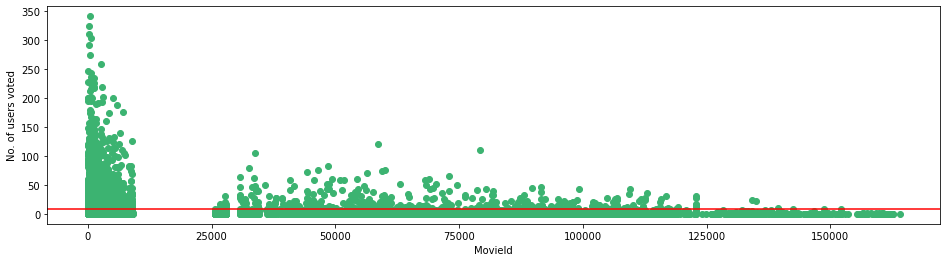

In [183]:
f,ax = plt.subplots(1,1,figsize=(16,4))
#rating['rating'].plot(kind='hist')
plt.scatter(user_voted.index,user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [184]:
df_rating=df_rating.loc[user_voted[user_voted>10].index,:]

In [185]:
df_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


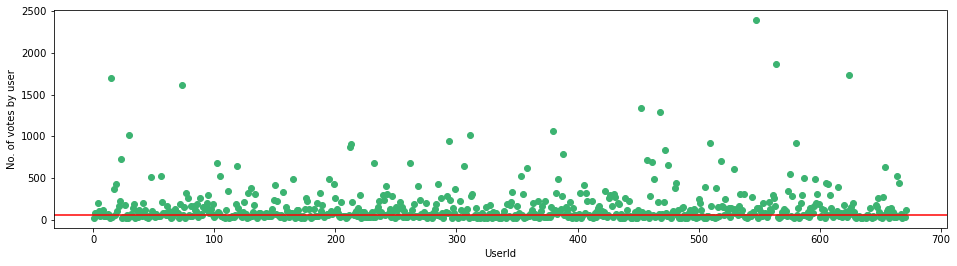

In [186]:
#visualize the number of votes by each user with our threshold of 50.
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(movies_voted.index,movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [187]:
df_rating=df_rating.loc[:,movies_voted[movies_voted > 50].index]

In [188]:
df_rating

userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
from scipy.sparse import csr_matrix

# Convert final_dataset to a CSR matrix

csr = csr_matrix(df_rating.values).astype('float32')
df_rating.reset_index(inplace=True)

In [190]:
csr 

<2083x421 sparse matrix of type '<class 'numpy.float32'>'
	with 73034 stored elements in Compressed Sparse Row format>

In [191]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [192]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = new_df3[new_df3['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['id']
        movie_idx = df_rating[df_rating['movieId'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = df_rating.iloc[val[0]]['movieId']
            idx = new_df3[new_df3['id'] == movie_idx].index
            recommend_frame.append({'Title':new_df3.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    
    else:
        
        return "No movies found. Please check your input"

In [193]:
df_rating.head()

userId,movieId,2,3,4,5,7,8,12,13,15,...,655,656,658,659,660,662,664,665,667,671
0,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
2,3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [194]:
get_movie_recommendation('jumanji')

'No movies found. Please check your input'

In [195]:
df_rating = rating.pivot(index='movieId',columns='userId',values='rating')
df_rating.fillna(0,inplace=True)

In [196]:
import pandas as pd

# Converting the DataFrame to a numpy array
ratings_matrix = df_rating.to_numpy()
print(ratings_matrix)


[[0. 0. 0. ... 0. 4. 5.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [199]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

class CollaborativeFilteringRecommender:
    def __init__(self, k=5):
        self.k = k  # No.of similar users to consider
        self.user_similarity = None
        self.ratings_matrix = None

    def fit(self, ratings_matrix):
        self.ratings_matrix = ratings_matrix
        self.user_similarity = cosine_similarity(ratings_matrix)

    def predict(self, user_id):
        user_ratings = self.ratings_matrix[user_id, :]
        similar_users = np.argsort(self.user_similarity[user_id, :])[::-1][1:self.k+1]
        similar_users_ratings = self.ratings_matrix[similar_users, :]

        # Calculate weighted average ratings based on similarities
        pred_ratings = np.average(similar_users_ratings, axis=0, weights=self.user_similarity[user_id, similar_users])

        return pred_ratings

    def recommend_movies(self, user_id, top_n=5):
        user_ratings = self.ratings_matrix[user_id, :]
        pred_ratings = self.predict(user_id)

        # Set already rated movies predicted ratings to a very low value
        pred_ratings[user_ratings.nonzero()] = -np.inf

        # Get indices of top N movies based on predicted ratings
        top_movie_indices = np.argsort(pred_ratings)[::-1][:top_n]

        return top_movie_indices


# Ratings matrix
ratings = ratings_matrix

# CollaborativeFilteringRecommender instance
recommender = CollaborativeFilteringRecommender(k=3)

recommender.fit(ratings)

# Prompt the user to enter a movie name
movie_name = input("Enter a movie name: ")

# Find the movie ID based on the movie name
movie_id = new_df3[new_df3['title'] == movie_name]['id'].iloc[0]

user_id = 0
top_recommendations = recommender.recommend_movies(user_id, top_n=3)

movie_id_to_name = dict(zip(new_df3['id'], new_df3['title']))

# Filter recommendations based on the entered movie ID
recommended_movies = [movie_id_to_name[id] for id in top_recommendations if id != movie_id]

print(f"Top recommendations: {recommended_movies}")

# Evaluate the model using RMSE
def evaluate_model(recommender, ratings_matrix):
    n_users, n_movies = ratings_matrix.shape
    errors = []
    
    for user_id in range(n_users):
        user_ratings = ratings_matrix[user_id, :]
        pred_ratings = recommender.predict(user_id)
        
        # Calculate error for non-zero ratings
        errors.extend((pred_ratings[user_ratings.nonzero()] - user_ratings[user_ratings.nonzero()]) ** 2)
    
    rmse = np.sqrt(np.mean(errors))
    return rmse

# Evaluate the model
rmse = evaluate_model(recommender, ratings_matrix)
print("RMSE:", rmse)

Enter a movie name: The god father


IndexError: single positional indexer is out-of-bounds